## Econ 409 Week 6: Machine Learning Review (Lasso, Ridge, and Elastic Net)

February 11 2022

### Topics to be Discussed:
Part 1: 
1. Ridge
2. Lasso
3. Elastic Net 

Part 2:

1. Preview of Analysis
2. Data
3. Fit model using the training data
4. Forecast out-of-sample, report MSEs

### Part 1: Ridge, Lasso, and Elastic Net - What are they? Why do we use them?

#### Bias-Variance Trade-off

Bias is the difference between the average prediction of our model and the correct value which we are trying to predict. A model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data.

Variance is the variability of model prediction for a given data point or a value which tells us spread of our data. A model with high variance pays a lot of attention to training data and does not generalize on the data which it has not seen before. As a result, such models perform very well on training data but has high error rates on test data.

Underfitting happens when a model is unable to capture the underlying pattern of the data. These models usually have high bias and low variance. It happens when we have small amount of data to build an accurate model, when we try to build a linear model with a nonlinear data, or when we use a simple model to capture complex patterns.

Overfitting happens when our model captures the noise along with the underlying pattern in data. It happens when we train our model a lot over noisy dataset. These models have low bias and high variance. These models are more complex. For example, machine learning methods like Decision trees are prone to overfitting.

To build a good model, we need to find a good balance between bias and variance.  A model with high bias tries to oversimplify the model whereas a model with high variance fails to generalize on unseen data. Upon reducing the bias, the model becomes susceptible to high variance and vice versa. Hence, a trade-off or balance between these two measures is what defines a good predictive model.

For this session, we will be focusing on the issue of **overfitting**.

#### Regularization 

Most of the techniques we are discussing today deal with regularization. Regularization is a technique used to avoid overfitting where the coefficients, if needed, are restricted or shrunken to zero.

Reducing the impact of less important features directly affects the quality of predictions as it reduces the degree of freedom which in turn makes it harder for the model to get more complex or overfit the data.

We do this by adding a penalty term. Ridge, Lasso, and the elastic net contain penalty terms, but of different forms. 

#### Ridge Regression

- It is a Regularization Method to reduce Overfitting.
- Includes an "L2" Penalty
- This has the effect of shrinking the coefficients for those input variables that do not contribute much to the prediction task.
- It is also often used for the analysis of multicollinearity in multiple regression data

What is the L2 penalty?

In the equation below, the L2 regularization element is the last portion ($\lambda \sum_{j=1}^p \beta_{j}^2$). It is the squared magnitude of the coefficient as a penalty term is added to the loss function by ridge regression.

The first portion is the Sum of Squared Error ($\sum_{i=1}^n[ y_{i} - \sum_{j=1}^p x_{i,j}\beta_{i}]^2$), which as you all remember is simply the difference between the observed value and the predicted value.

$\sum_{i=1}^n[ y_{i} - \sum_{j=1}^p x_{i,j}\beta_{i}]^2 + \lambda \sum_{j=1}^p \beta_{j}^2$


If lambda is zero, then we get OLS. However, a high value of lambda may add too much weight, which will result in model under-fitting. Therefore, it is important how we choose the parameter lambda for our model. 

The larger lambda is, our prediction became less sensitive to independent variables. We can use Cross-Validation. Typically 10-Fold Cross Validation is used in order to determine which lambda returns the lowest variance. Lambda is the Tuning Parameter that controls the bias-variance tradeoff and we estimate its best value via cross-validation.

#### Lasso Regression 

Unlike Ridge Regression, which uses the L2 penalty, Lasso Regression uses the L1 penalty. 

What is the L1 penalty?

In the equation below, the L1 regularization element is the last portion ($\lambda \sum_{j=1}^p |\beta_{j}|$). Everything is the same as in the Ridge regression except rather than the square of the coefficient, we take the absolute value. 

$\sum_{i=1}^n[ y_{i} - \sum_{j=1}^p x_{i,j}\beta_{i}]^2 + \lambda \sum_{j=1}^p |\beta_{j}|$

As before, when $\lambda$ is zero, then we get OLS. As $\lambda$ increases, more coefficients are set to zero and eliminated. However, it is alos the case (as with Ridge regression) that as $\lambda$ increases, bias increases and as $\lambda$ decreases, variance increases.

As with ridge regression, we can estimate the vest value for $\lambda$ with cross-validation.

Lasso is super useful for variable selection.

**Key Difference** between Ridge and Lasso is that

- Ridge drives down the overall size of the weight values during optimization and reduces overfitting.
- Lasso causes the weights of some features to decline to zero at some point. Eliminating those features which cause high variance and model over-fitting issues.

#### Elastic Net

Elastic Net was formed in response to the critique of the lasso. These critiques include that lasso variable selection can be too dependent on data and thus unstable. The solution is to combine the penalties of ridge regression and lasso to get the best of both worlds. Hence, Elastic Net has an L1 and L2 component. Below is the equation for Elastic Net. 


$\frac{\sum_{i=1}^n[ y_{i} - \sum_{j=1}^p x_{i,j}\beta_{i}]^2}{2n} + \lambda (\frac{1-\alpha}{2}\sum_{j=1}^p \beta_{j}^2 + \sum_{j=1}^p |\beta_{j}|)$


Unlike lasso and ridge, it has two parameters to be set, $\lambda$ and $\alpha$. $\alpha$ is the mixing parameter between ridge ($\alpha$ = 0) and lasso ($\alpha$ = 1). You can still use cross validation to find these values (if you are using R and not Python I recommend caret for $\alpha$).


### Part 2

#### 1. Preview of Analysis
- The goal here is to forecast inflation (CPI change)
- CPI is measured every month, but reported in the mid of the subsequent month
- Here, we will do a simple exercise where we aim to forecast soon-to-be reported inflation using only **Google Trends data**
- We are going to use one of the simplest (regularization) ML estimation methods : Ridge, Lasso, and Elastic Net

#### 2. Google Trends Data

* Collected a subset of inflation-related words (30 words) from Google Trends
* Numbers in each column represent the relative frequency of each word searched on google for the given time period (Nov, 2004 ~ Oct, 2020)
    * 100 represents that it is the month when the word was searched the most for in the given time period
* The **last column** (reported inflation) is the actual inflation reported in the subsequent month



In [1]:
# Import Libraries
import numpy as np # package for scientific computing
import pandas as pd # package for data manipulation
import os # package for communicating with operating system
import statsmodels.formula.api as smf # package for statistical models i.e. OLS
import scipy.stats as st
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Read data
df = pd.read_csv("US_GoogleTrends_CPI.csv", header=0)
df.head(5)

,Date,inflation,rate,rates,rise,slowing,inflationary,rising,unemployment,recession,...,increase,deflation,increases,accelerating,worries,weak,trend,weaker,upward,reported inflation
0,11/1/04,95,73,69,19,17,26,44,4,6,...,41,9,33,14,10,44,90,13,40,0.032556
1,12/1/04,81,71,70,20,12,23,44,4,4,...,38,6,27,19,11,40,87,6,26,0.029698
2,1/1/05,87,72,72,20,13,41,35,5,3,...,39,15,28,15,9,37,84,15,33,0.030075
3,2/1/05,79,76,74,18,17,86,39,4,4,...,41,8,28,5,10,43,87,32,59,0.031483
4,3/1/05,96,76,76,19,10,55,42,4,5,...,41,5,31,13,11,44,91,9,48,0.035106


In [3]:
# Reset index with Date
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')
df = df.set_index('Date')
df.head(5)

,inflation,rate,rates,rise,slowing,inflationary,rising,unemployment,recession,growth,...,increase,deflation,increases,accelerating,worries,weak,trend,weaker,upward,reported inflation
Date,,,,,,,,,,,,,,,,,,,,,
2004-11-01,95,73,69,19,17,26,44,4,6,88,...,41,9,33,14,10,44,90,13,40,0.032556
2004-12-01,81,71,70,20,12,23,44,4,4,80,...,38,6,27,19,11,40,87,6,26,0.029698
2005-01-01,87,72,72,20,13,41,35,5,3,84,...,39,15,28,15,9,37,84,15,33,0.030075
2005-02-01,79,76,74,18,17,86,39,4,4,85,...,41,8,28,5,10,43,87,32,59,0.031483
2005-03-01,96,76,76,19,10,55,42,4,5,85,...,41,5,31,13,11,44,91,9,48,0.035106


<AxesSubplot:xlabel='Date'>

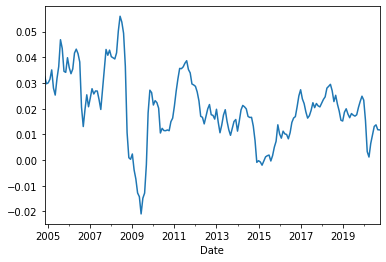

In [4]:
df["reported inflation"].plot()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 192 entries, 2004-11-01 to 2020-10-01
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inflation           192 non-null    int64  
 1   rate                192 non-null    int64  
 2   rates               192 non-null    int64  
 3   rise                192 non-null    int64  
 4   slowing             192 non-null    int64  
 5   inflationary        192 non-null    int64  
 6   rising              192 non-null    int64  
 7   unemployment        192 non-null    int64  
 8   recession           192 non-null    int64  
 9   growth              192 non-null    int64  
 10  fed                 192 non-null    int64  
 11  slowdown            192 non-null    int64  
 12  expectations        192 non-null    int64  
 13  pressures           192 non-null    int64  
 14  borrowing           192 non-null    int64  
 15  drop                192 non-null    in

In [6]:
## Additional Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Lasso, Elastic Net
from sklearn.linear_model import Lasso, ElasticNet, Ridge

In [10]:
#let's first split the data into training and testing
# (1) Split dataset into training and testing (75:25)

X = df.iloc[:,0:30] #independent variables
y = df.iloc[:, -1] #dependent variable (reported inflation)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle=False)#splitting data, test data only 25% of data
#Shuffle set to false, allows you to use the previously trained data. Setting this to true means that you may want to retrain

#### Applied to Ridge Regression

**Important** what is lambda in the equations above is marked as alpha in the python packages. 

Now we can continue to calculate our coefficients from ridge regression when varying the regularization parameter (alpha). This is done using the ‘Ridge’ function from sklearn.linear_model package. We will cycle through varying alpha values and for each alpha will have an array of beta coefficients taken.

Finally, a plot of Alpha vs Beta is produced. Note that the intercept would correspond to alpha=0, the ordinary least squares model

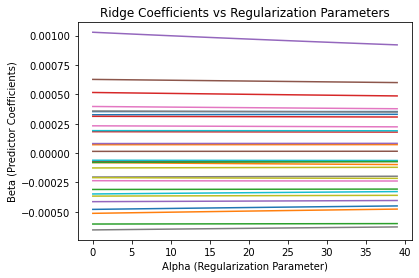

In [47]:
#Let's just plot a wide range of lambdas to see how things change with it.

###initialize list to store coefficient values
coef=[]
alphas = range(0,40)#I randomly chose 40

for a in alphas:
  ridgereg=Ridge(alpha=a)
  ridgereg.fit(X_train, y_train)
  coef.append(ridgereg.coef_)

###Make plot of Beta as a function of Alpha
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(alphas,coef)
ax.set_xlabel('Alpha (Regularization Parameter)')
ax.set_ylabel('Beta (Predictor Coefficients)')
ax.set_title('Ridge Coefficients vs Regularization Parameters')
ax.axis('tight')
###ax.legend(loc='best')
fig.savefig('coef_vs_alpha.png')


As you can see from above, the lambda chosen can impact your results. 

Below, we will walk through how to obtain the appropriate lambda (or as discussed "alpha" in the code).


In [28]:

# Step 1 : Fit Rdidge
ridge = Ridge().fit(X_train, y_train)

# Step 2 : Create a grid containing the potential values of lambdas
ridge_lambdas = {'alpha':np.linspace(0.001, 1, 40)}#this says the following: starting value, ending value, number of samples


# Step 3 : Among the grid of lambdas, select the lambda that gives you the least error rate using cross-validation
ridge_best = GridSearchCV(ridge, ridge_lambdas, cv=10, scoring ='neg_mean_squared_error').fit(X_train, y_train)
#neg_mean_squared_error -> returns the mean squared error, all values are positive or zero

#above I chose a cross validation of 10. Remember CV is a resampling method. this divides the data.

In [29]:
ridge_best #take a quick look of what this function produces. 

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.001     , 0.00353846, 0.00607692, 0.00861538, 0.01115385,
       0.01369231, 0.01623077, 0.01876923, 0.02130769, 0.02384615,
       0.02638462, 0.02892308, 0.03146154, 0.034     , 0.03653846,
       0.03907692, 0.04161538, 0.04415385, 0.04669231, 0.04923077,
       0.05176923, 0.05430769, 0.05684615, 0.05938462, 0.06192308,
       0.06446154, 0.067     , 0.06953846, 0.07207692, 0.07461538,
       0.07715385, 0.07969231, 0.08223077, 0.08476923, 0.08730769,
       0.08984615, 0.09238462, 0.09492308, 0.09746154, 0.1       ])},
             scoring='neg_mean_squared_error')

In [30]:
ridge_best.best_estimator_ #to obtain the best value of alpha based on the MSE. We will use this value later. 

Ridge(alpha=0.1)

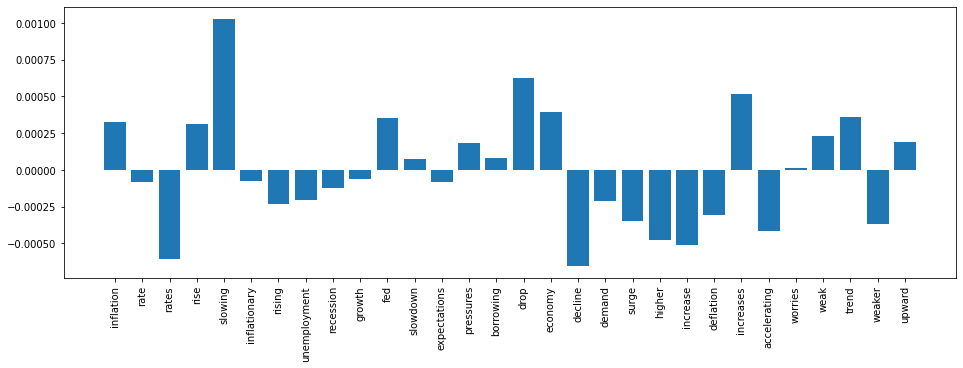

In [31]:
# Step 4 : See the magnitude of the coefficients
##this plot tells us which variables influence inflation and the extent to which they do. Unlike Lasso, all variables are included, but just weigh them in importance.
ridge_coef = ridge_best.best_estimator_.coef_
plt.figure(figsize=(16,5))
plt.bar(X.columns.values.tolist(), ridge_coef.flatten().tolist())
plt.xticks(rotation='vertical')
plt.show()

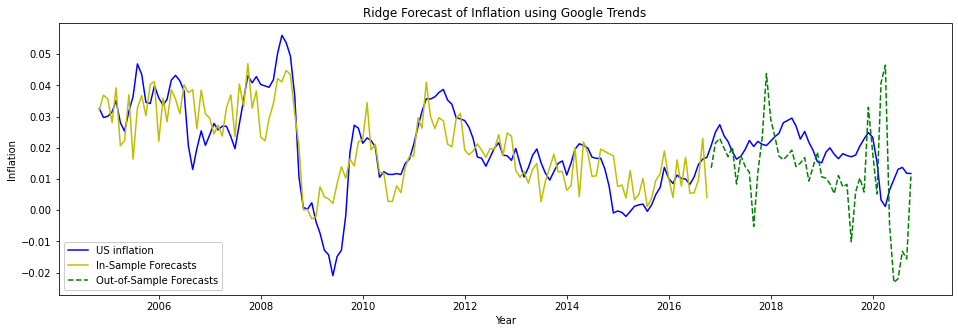

In [32]:
# Step 5 : Forecast using the test data
y_pred_in = ridge_best.predict(X_train) #this uses the best estimater for lambda we found earlier.
y_pred_out = ridge_best.predict(X_test)
# Plot
plt.figure(figsize=(16,5))
plt.plot(y.index, y, color='b', label='US inflation') #actual value
plt.plot(y_train.index, y_pred_in, color = 'y', label = 'In-Sample Forecasts') #forecast training
plt.plot(y_test.index, y_pred_out, ls='--', color = 'g', label = 'Out-of-Sample Forecasts') #forcast test
plt.gca().set(title="Ridge Forecast of Inflation using Google Trends", xlabel="Year", ylabel="Inflation")
plt.legend(framealpha=1, frameon=True)
plt.show()

In [33]:
# Step 6 : Calculate Metrics - MSE
in_sample_mse = round(mean_squared_error(y_train, y_pred_in),6)
out_sample_mse = round(mean_squared_error(y_test, y_pred_out),6)
print('Ridge In-Sample MSE : ', in_sample_mse ,'\nRidge Out-of-Sample MSE : ',out_sample_mse)

Ridge In-Sample MSE :  7.7e-05 
Ridge Out-of-Sample MSE :  0.00025


#### Applied to Lasso Regression


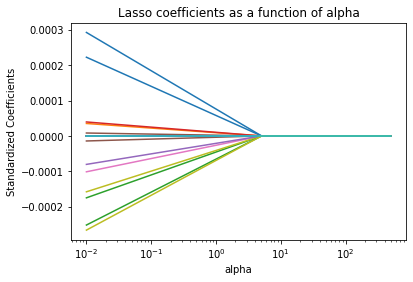

In [70]:
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

Remember that if alpha = 0, then the lasso gives the least squares fit, and when alpha becomes very large, the lasso gives the null model in which all coefficient estimates equal zero.

Moving from left to right in our plot, we observe that at first the lasso models contains many predictors with high magnitudes of coefficient estimates. With increasing alpha, the coefficient estimates approximate towards zero.

In [71]:
# Step 1 : Fit Lasso
lasso = Lasso().fit(X_train, y_train)

# Step 2 : Create a grid containing the potential values of lambdas
lasso_lambdas = {'alpha':np.linspace(0.001, 1, 40)} #this says the following: starting value, ending value, number of samples


In [72]:
# Step 3 : Among the grid of lambdas, select the lambda that gives you the least error rate using cross-validation
lasso_best = GridSearchCV(lasso, lasso_lambdas, cv=10, scoring = 'neg_mean_squared_error').fit(X_train, y_train)


In [73]:
lasso_best.best_estimator_ #best value of alpha 

Lasso(alpha=0.026615384615384617)

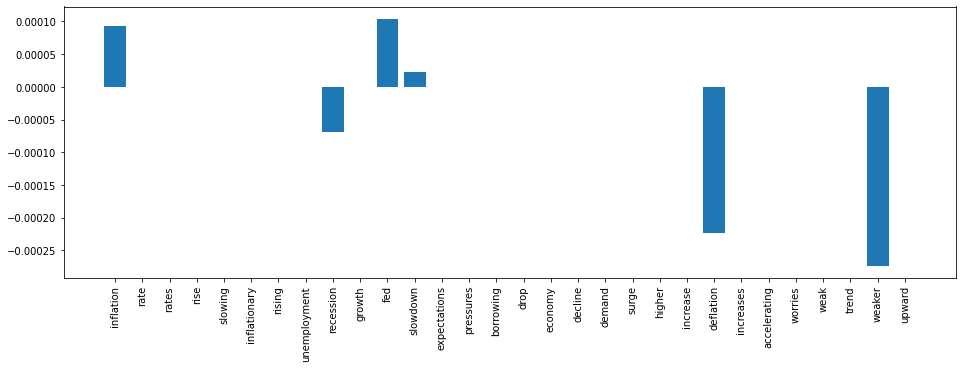

In [74]:
# Step 4 : See the magnitude of the coefficients
##this plot tells us which variables influence inflation and the extent to which they do. Those with no value are not included in the analysis

lasso_coef = lasso_best.best_estimator_.coef_

plt.figure(figsize=(16,5))
plt.bar(X.columns.values.tolist(), lasso_coef.tolist())
plt.xticks(rotation='vertical')
plt.show()

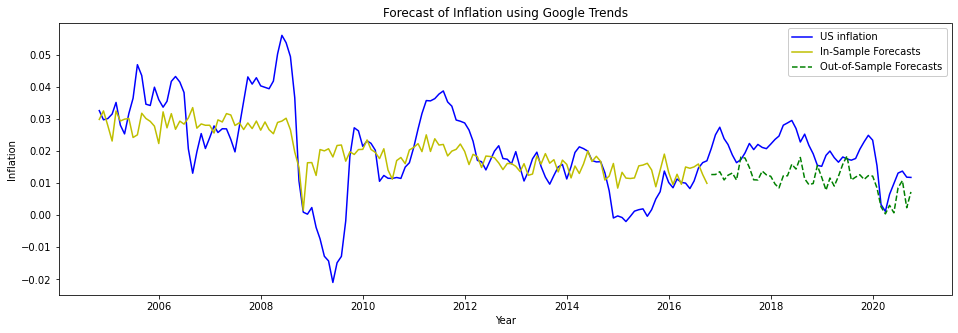

In [75]:
# Step 5 : Forecast using the test data
y_pred_in = lasso_best.predict(X_train)
y_pred_out = lasso_best.predict(X_test)

# Plot
plt.figure(figsize=(16,5))
plt.plot(y.index, y, color='b', label='US inflation')
plt.plot(y_train.index, y_pred_in, color = 'y', label = 'In-Sample Forecasts')
plt.plot(y_test.index, y_pred_out, ls='--', color = 'g', label = 'Out-of-Sample Forecasts')
plt.gca().set(title="Forecast of Inflation using Google Trends", xlabel="Year", ylabel="Inflation")
plt.legend(framealpha=1, frameon=True)
plt.show()

In [76]:
# Step 6 : Calculate Metrics - MSE
in_sample_mse = round(mean_squared_error(y_train, y_pred_in),6)
out_sample_mse = round(mean_squared_error(y_test, y_pred_out),6)
print('Lasso In-Sample MSE : ', in_sample_mse ,'\nLasso Out-of-Sample MSE : ', out_sample_mse)


Lasso In-Sample MSE :  0.000137 
Lasso Out-of-Sample MSE :  8.6e-05


#### Applied to Elastic Net

Remember that with Elastic Net we want to find $\lambda$ and $\alpha$. We will use cross validation per usual. In the python output alpha = lambda, and l1_ratio = alpha as presented in the equations above. 


In [77]:
np.linspace(0.001, 1, 40) #this says the following: starting value, ending value, number of samples
#just to take a closer look at what this does

array([0.001     , 0.02661538, 0.05223077, 0.07784615, 0.10346154,
       0.12907692, 0.15469231, 0.18030769, 0.20592308, 0.23153846,
       0.25715385, 0.28276923, 0.30838462, 0.334     , 0.35961538,
       0.38523077, 0.41084615, 0.43646154, 0.46207692, 0.48769231,
       0.51330769, 0.53892308, 0.56453846, 0.59015385, 0.61576923,
       0.64138462, 0.667     , 0.69261538, 0.71823077, 0.74384615,
       0.76946154, 0.79507692, 0.82069231, 0.84630769, 0.87192308,
       0.89753846, 0.92315385, 0.94876923, 0.97438462, 1.        ])

In [78]:
# Step 1 : Fit Elastic Net
eNet = ElasticNet().fit(X_train, y_train)

# Step 2 : Create a grid containing the potential values of lambdas and alphas
eNet_params = {'alpha':np.linspace(0.001, 1, 40), 'l1_ratio':np.linspace(0.001, 1, 40)}

In [79]:
# Step 3 : Among the grid of params, select the lambda and alpha that gives you the least error rate using cross-validation
eNet_best = GridSearchCV(eNet, eNet_params, cv=10, scoring = 'neg_mean_squared_error').fit(X_train, y_train)


In [80]:
# attribute of the eNet_best object
eNet_best.best_estimator_

ElasticNet(alpha=0.7438461538461538, l1_ratio=0.026615384615384617)

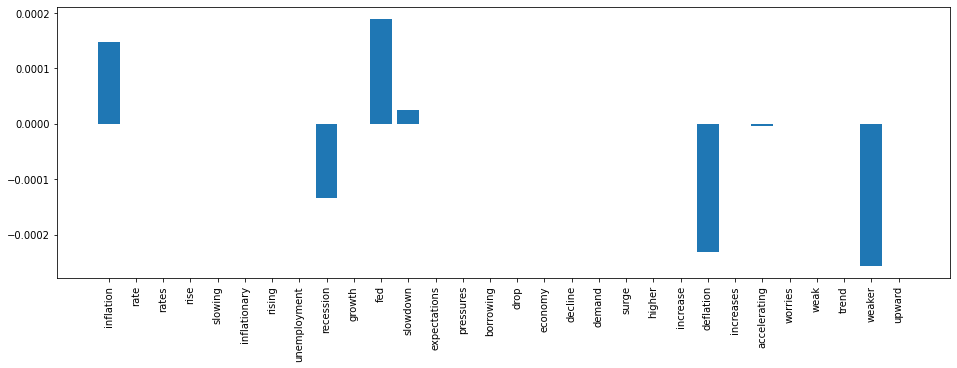

In [81]:
# Step 4 : See the magnitude of the coefficients
eNet_coef = eNet_best.best_estimator_.coef_

plt.figure(figsize=(16,5))
plt.bar(X.columns.values.tolist(), eNet_coef.tolist())
plt.xticks(rotation='vertical')
plt.show()

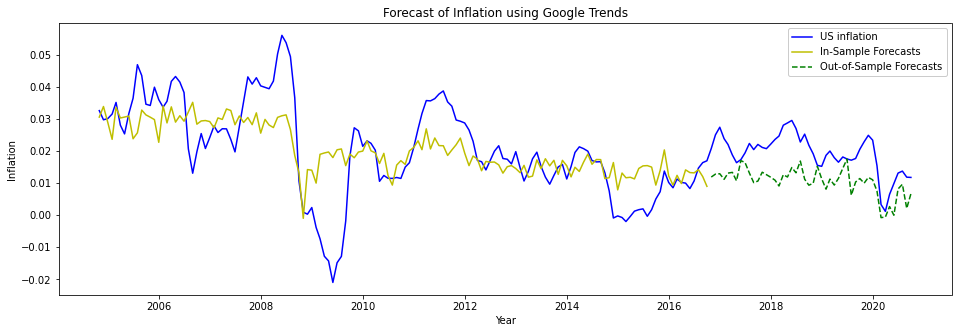

In [82]:
# Step 5 : Forecast using the test data
y_pred_in = eNet_best.predict(X_train)
y_pred_out = eNet_best.predict(X_test)

# Plot
plt.figure(figsize=(16,5))
plt.plot(y.index, y, color='b', label='US inflation')
plt.plot(y_train.index, y_pred_in, color = 'y', label = 'In-Sample Forecasts')
plt.plot(y_test.index, y_pred_out, ls='--', color = 'g', label = 'Out-of-Sample Forecasts')
plt.gca().set(title="Forecast of Inflation using Google Trends", xlabel="Year", ylabel="Inflation")
plt.legend(framealpha=1, frameon=True)
plt.show()

In [83]:
# Step 6 : Calculate Metrics - MSE
in_sample_mse = round(mean_squared_error(y_train, y_pred_in),6)
out_sample_mse = round(mean_squared_error(y_test, y_pred_out),6)
print('Elastic Net In-Sample MSE : ', in_sample_mse ,'\nElastic Net Out-of-Sample MSE : ', out_sample_mse)


Elastic Net In-Sample MSE :  0.000128 
Elastic Net Out-of-Sample MSE :  9.4e-05


Which model is better? 

Ridge In-Sample MSE :  7.7e-05 #lowest in sample
Ridge Out-of-Sample MSE :  0.00025


Lasso In-Sample MSE :  0.000137 
Lasso Out-of-Sample MSE :  8.6e-05

Elastic Net In-Sample MSE :  0.000128 
Elastic Net Out-of-Sample MSE :  9.4e-05 #lowest out of sample



#### Extra: How to choose the best model with code?

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = "r2" #comparing using r2, but can use other measures

# Spot-Check Algorithms
models = []
models.append((' LR ', LinearRegression()))
models.append((' Ridge ', Ridge()))
models.append((' LASSO ', Lasso()))
models.append((' EN ', ElasticNet()))
models.append((' KNN ', KNeighborsRegressor())) #did not cover today
models.append((' CART ', DecisionTreeRegressor())) #did not cover today
models.append((' SVR ', SVR())) #did not cover today

In [68]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    # print(cv_results)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) #remember we are resampling with cross validation so we want the mean
    print(msg)

 LR : 0.315280 (0.238561)
 Ridge : 0.315602 (0.238512)
 LASSO : -0.113783 (0.162031)
 EN : -0.113783 (0.162031)
 KNN : 0.318162 (0.241515)
 CART : 0.063395 (0.530851)
 SVR : -0.161883 (0.240373)


If we are selecting a model with the highest R squared, KNN seems like a good choice, but I may try other scoring methods. Though none seem particularly great. 